In [60]:

#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [61]:
df = pd.read_csv('C:/Users/swaqu/Desktop/projects/Github-DataScience/Data.csv')

In [62]:
df.head()

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099790
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022200
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063890


In [63]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [64]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [65]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [66]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [67]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [68]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [45]:

CLIENT_ID = '' # use foursquare Client id
CLIENT_SECRET = '' # use foursquare secret
VERSION = '20180605'
LIMIT = 150

In [69]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [70]:

unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [71]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [72]:
borough_colors

{'Central': '#417D69',
 'Eastern': '#B78666',
 'NorthEastern': '#38885E',
 'Northern': '#01F565',
 'SouthEastern': '#65ECE2',
 'Southern': '#8B06BA',
 'SouthernSuburbs': '#C893AD',
 'Western': '#5946A8'}

In [73]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [74]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [75]:
bangalore_map

## Exploring bangalore Neighborhoods using FourSquare API

In [82]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [83]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [84]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  611


In [85]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [86]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       109
Bakery                   30
Café                     29
Fast Food Restaurant     28
Ice Cream Shop           23
Department Store         22
Pizza Place              19
Coffee Shop              17
Chinese Restaurant       15
Hotel                    10
Name: Neighborhood, dtype: int64

In [87]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  129


#### Number of venues per Neighborhood

In [88]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [89]:

individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             5
        Domlur                     11
        Indiranagar                67
        Jeevanbheemanagar           4
        Malleswaram                 6
...                               ...
Western Mahalakshmi Layout         11
        Nagarbhavi                  6
        Nayandahalli                2
        Rajarajeshwari Nagar        6
        Vijayanagar                 3

[62 rows x 1 columns]

In [90]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [91]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [92]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,11
2,Central,Indiranagar,67
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
...,...,...,...
57,Western,Mahalakshmi Layout,11
58,Western,Nagarbhavi,6
59,Western,Nayandahalli,2
60,Western,Rajarajeshwari Nagar,6


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

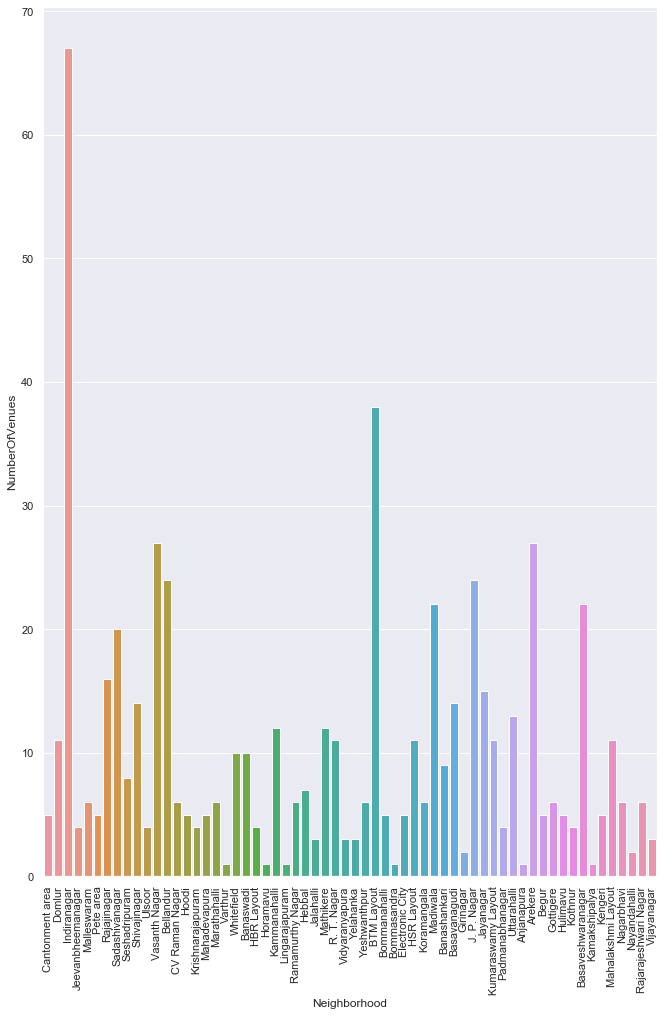

In [93]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

#### Exploring Whitefield Venues

In [94]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
238,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
239,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
240,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
241,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
242,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
243,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
244,Whitefield,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
245,Whitefield,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant
246,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
247,Whitefield,Eastern,12.9698,77.7499,Onions,12.965671,77.748877,Indian Restaurant


#### One hot encoding to compare different venues on common scale

In [95]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [96]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Anjanapura,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Arekere,0.000000,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.037037,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,BTM Layout,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.052632,0.0,0.0
3,Banashankari,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Banaswadi,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.100000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vidyaranyapura,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
58,Vijayanagar,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
59,Whitefield,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
60,Yelahanka,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0


In [98]:

number_of_top_venues = 5

In [99]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                          Venue  Frequency
0                            Venue Category_ATM        1.0
1              Venue Category_Indian Restaurant        0.0
2          Venue Category_Performing Arts Venue        0.0
3                           Venue Category_Park        0.0
4  Venue Category_Paper / Office Supplies Store        0.0


--------- Arekere ---------
                                 Venue  Frequency
0   Venue Category_Sporting Goods Shop       0.15
1     Venue Category_Indian Restaurant       0.11
2           Venue Category_Pizza Place       0.07
3      Venue Category_Department Store       0.07
4  Venue Category_Gym / Fitness Center       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.18
1         Venue Category_Snack Place       0.08
2              Venue Category_Bakery       0.08
3      Venue Category_Ice Cream Shop       0.08
4  Venue Cat

4              Venue Category_Nightclub       0.00


--------- Krishnarajapuram ---------
                           Venue  Frequency
0  Venue Category_Clothing Store       0.50
1          Venue Category_Bakery       0.25
2          Venue Category_Market       0.25
3             Venue Category_ATM       0.00
4       Venue Category_Multiplex       0.00


--------- Kumaraswamy Layout ---------
                           Venue  Frequency
0      Venue Category_Food Truck       0.18
1  Venue Category_Sandwich Place       0.18
2    Venue Category_Burger Joint       0.09
3            Venue Category_Café       0.09
4  Venue Category_Breakfast Spot       0.09


--------- Lingarajapuram ---------
                                          Venue  Frequency
0                  Venue Category_Train Station        1.0
1                            Venue Category_ATM        0.0
2             Venue Category_Miscellaneous Shop        0.0
3                           Venue Category_Park        0.0
4  Venue 

                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.33
1                         Venue Category_Bakery       0.33
2           Venue Category_Fast Food Restaurant       0.33
3  Venue Category_Paper / Office Supplies Store       0.00
4                Venue Category_Paintball Field       0.00


--------- Whitefield ---------
                              Venue  Frequency
0             Venue Category_Bakery        0.2
1              Venue Category_Hotel        0.1
2               Venue Category_Café        0.1
3  Venue Category_Indian Restaurant        0.1
4  Venue Category_Kerala Restaurant        0.1


--------- Yelahanka ---------
                          Venue  Frequency
0            Venue Category_ATM       0.33
1     Venue Category_Smoke Shop       0.33
2  Venue Category_Train Station       0.33
3      Venue Category_Nightclub       0.00
4  Venue Category_Movie Theater       0.00


--------- Yeshwanthpur ---------
      

In [100]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [101]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,Venue Category_Liquor Store
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Fast Food Restaurant,Venue Category_Sandwich Place
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Electronics Store,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Convenience Store,Venue Category_Market,Venue Category_Juice Bar,Venue Category_Café,Venue Category_Women's Store,Venue Category_Falafel Restaurant,Venue Category_Flea Market


In [102]:
neighborhoods_venues_sorted.shape

(62, 11)

#### Finding optimal k value for clustering using the elbow method

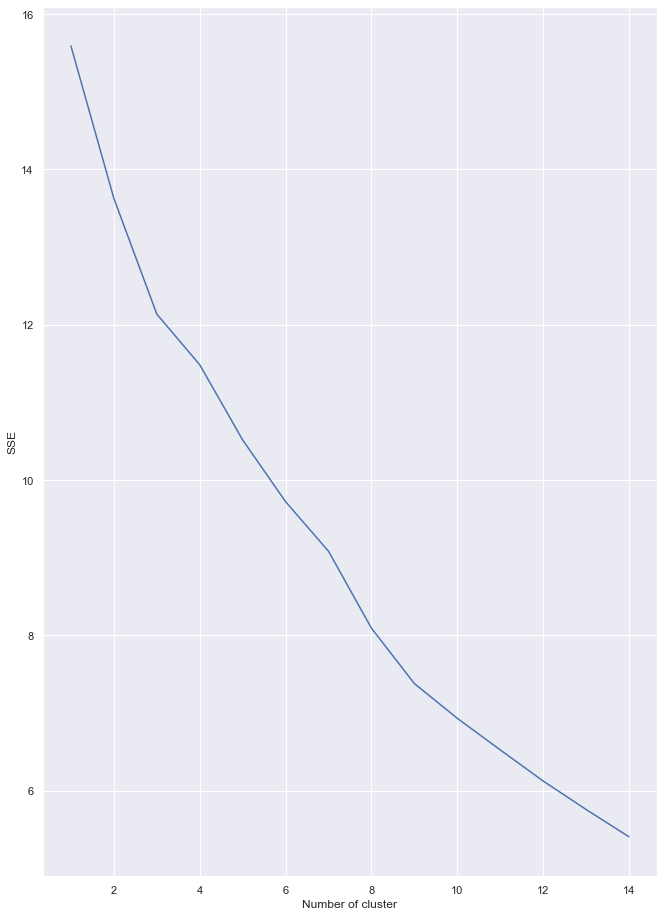

In [103]:

sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### From the above graph, we can see the optimal value for cluster is 5

In [104]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [105]:

kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [106]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [107]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    32
1     3
2    19
3     4
4     4
Name: Neighborhood, dtype: int64

In [108]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tea Room', 'Venue Category_Tex-Mex Restaurant',
       'Venue Category_Toll Plaza', 'Venue Category_Toy / Game Store',
       'Venue Category_Train Station', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=131)

In [109]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [110]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Ice Cream Shop,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Drugstore,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Breakfast Spot,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Electronics Store,Venue Category_Fish & Chips Shop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0


In [111]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')


In [112]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [113]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [114]:
map_clusters

#### Finding similar locations based on user input (recommending location)

In [115]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [116]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [117]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [118]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099790,0.293051
1,Central,Domlur,56837.022200,0.879225
2,Central,Indiranagar,41991.817440,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063890,0.824047


In [119]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


#### Recommending Veg Restaurant

In [120]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Swiss Restaurant,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:

bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [122]:

bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [123]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [124]:

bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [125]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [126]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [127]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

#### Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [128]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [129]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,592,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,593,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,594,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,595,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,596,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,597,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
6,598,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
7,599,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant
8,600,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
9,601,Whitefield,Venue Category_Bakery,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Hotel Bar,Venue Category_Indian Restaurant,Venue Category_Hotel,Venue Category_Café,Venue Category_Gym / Fitness Center,...,0.0,0.0,0,Eastern,12.9698,77.7499,Onions,12.965671,77.748877,Indian Restaurant


In [130]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [131]:
target_cluster

0

In [132]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [133]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
2,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
3,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
4,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
5,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place


In [134]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 429 neighborhoods which has similar characteristics to Whitefield.


In [135]:

possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,2,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
2,3,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
3,4,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
4,5,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place


In [136]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\Users\swaqu\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [137]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [138]:

possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop,138760,0.141072,29378.71663,0.454466,0,1.0
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,Guru Garden,12.891196,77.597979,Indian Restaurant,138760,0.141072,29378.71663,0.454466,0,1.0
2,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant,138760,0.141072,29378.71663,0.454466,0,1.0
3,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,Kababis,12.889605,77.597557,Indian Restaurant,138760,0.141072,29378.71663,0.454466,0,1.0
4,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Bar,Venue Category_Business Service,Venue Category_Fast Food Restaurant,Venue Category_Bus Line,...,Pizza Hut,12.889420,77.597494,Pizza Place,138760,0.141072,29378.71663,0.454466,0,1.0


In [139]:

possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [140]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Park,Venue Category_Snack Place,Venue Category_Chaat Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Paper / Office Supplies Store,Venue Category_Arts & Crafts Store,Venue Category_Café,...,12.988665,77.552434,Arts & Crafts Store,981362,0.99771,60967.53587,0.943121,1,0.5,0.878947
1,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Park,Venue Category_Snack Place,Venue Category_Chaat Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Paper / Office Supplies Store,Venue Category_Arts & Crafts Store,Venue Category_Café,...,12.989189,77.550302,Indian Restaurant,981362,0.99771,60967.53587,0.943121,1,0.5,0.878947
2,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Park,Venue Category_Snack Place,Venue Category_Chaat Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Paper / Office Supplies Store,Venue Category_Arts & Crafts Store,Venue Category_Café,...,12.987441,77.549826,Bakery,981362,0.99771,60967.53587,0.943121,1,0.5,0.878947
3,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Park,Venue Category_Snack Place,Venue Category_Chaat Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Paper / Office Supplies Store,Venue Category_Arts & Crafts Store,Venue Category_Café,...,12.987669,77.549978,Bakery,981362,0.99771,60967.53587,0.943121,1,0.5,0.878947
4,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Park,Venue Category_Snack Place,Venue Category_Chaat Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Paper / Office Supplies Store,Venue Category_Arts & Crafts Store,Venue Category_Café,...,12.991578,77.554561,Bakery,981362,0.99771,60967.53587,0.943121,1,0.5,0.878947


In [141]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [142]:
top3_df = pd.DataFrame(top3).reset_index()

In [143]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,[0.32959888841798324]
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,[0.691811775127418]
2,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Breakfast Spot,[0.8234029969298623]


#### Above are the top 3 neighborhoods to find similar food to whitefield restaurant's veg food !